In [49]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
database_path = 'ma_base_de_donnees.db'

conn = sqlite3.connect(database_path)
query = "SELECT id, combinaison_num, combinaison, noeud, resultat FROM vitesse_convergence"

df = pd.read_sql_query(query, conn)
df.head()

,id,combinaison_num,combinaison,noeud,resultat
0,1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6,sortie de l'univers
1,2,302231454903657293676544,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",8,volume dépassant le 4x4x4
2,3,321120920835135874531328,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",8,volume dépassant le 4x4x4
3,4,340010386766614455386112,"[0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, ...",8,volume dépassant le 4x4x4
4,5,358899852698093036240896,"[0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, ...",8,volume dépassant le 4x4x4


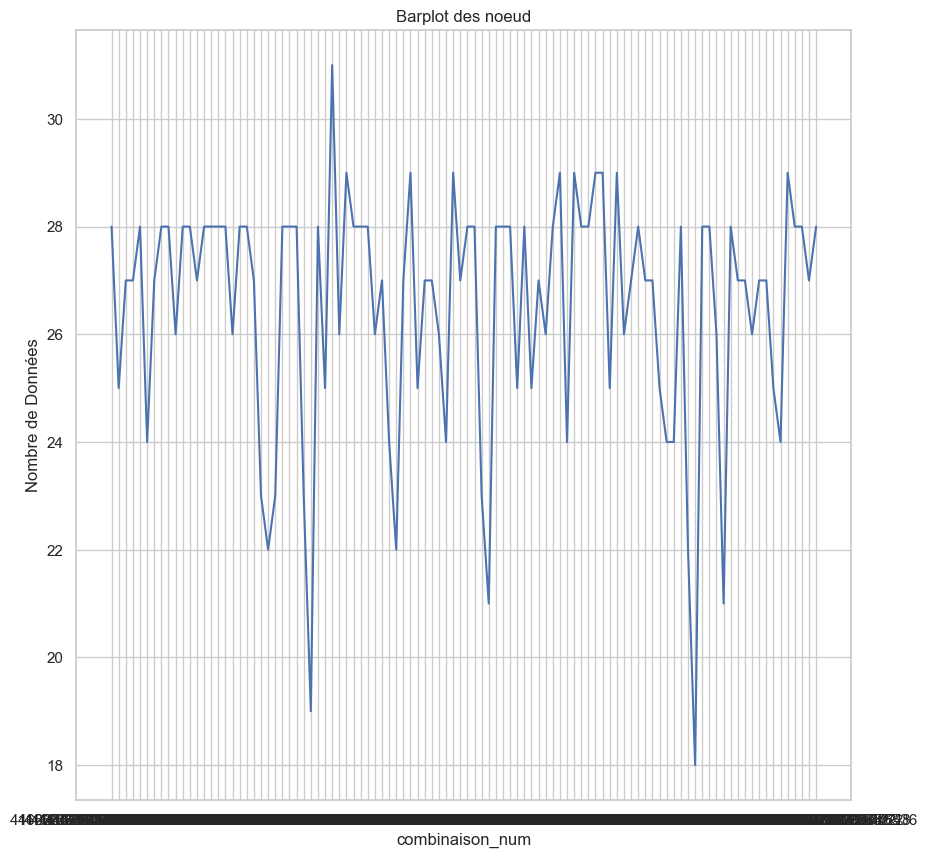

In [57]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='combinaison_num', y='noeud', data=df.sample(100), estimator=len, errorbar=None)
plt.title('Barplot des noeud')
plt.xlabel('combinaison_num')
plt.ylabel('Nombre de Données')
plt.show()

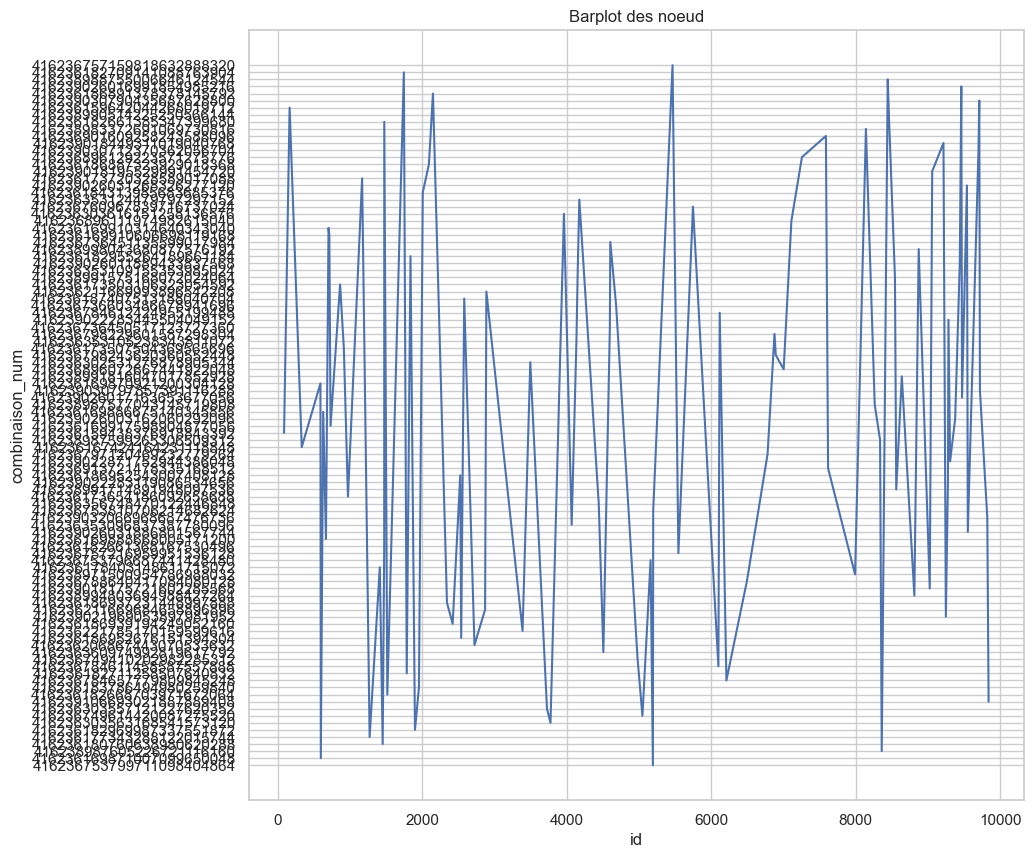

In [58]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='id', y='combinaison_num', data=df.sample(100), estimator=len, errorbar=None)
plt.title('Barplot des noeud')
plt.xlabel('id')
plt.ylabel('combinaison_num')
plt.show()

In [40]:
np.mean([int(i) for i in df.combinaison_num.dropna().sample(100)])

4.1623694162558867e+23

In [55]:
math.log10(int(df.combinaison_num[9999]) - int(df.combinaison_num[1000]))

18.46863420694127

In [56]:
print(int(df.combinaison_num[9999]), math.log10(int(df.combinaison_num[9999])))
print(int(df.combinaison_num[1000]))

416239115603257960955904 23.619342890129396
416236173660577003995136


In [3]:
#fonction pour trier les combinaisons en fonction des premières valeurs
def determine_value(combination, niveau=1):
    if len(combination) >= 2:
        if niveau == 1:
            return int(combination[1])
        elif niveau == 2:
            return int(combination[1]) * 4 + int(combination[4])
        elif niveau == 3:
            return int(combination[1]) * 4 * 4 + int(combination[4])*4 + int(combination[7])
        elif niveau == 4:
            return int(combination[1])*4*4*4 + int(combination[4])*4*4 + int(combination[7])*4 + int(combination[10])
        elif niveau == 5:
            return int(combination[1])*4*4*4*4+int(combination[4])*4*4*4+int(combination[7])*4*4+int(combination[10])*4+ int(combination[13])
    else:
        return None
df['first_digit_comb'] = df['combinaison'].apply(determine_value, 1)

#ajout des colonnes noeudmoyen, noeudmax et count pour avoir des stats en fonction des 1res valeurs des combinaisons
grouped = df.groupby('first_digit_comb')['noeud'].agg(['mean', 'max', "count"])
grouped = grouped.rename(columns={'mean': 'noeud_moyen', 'max': 'noeud_max'})
df = df.merge(grouped, on='first_digit_comb', how='left')

In [6]:
motif = "[{}"
print(motif)
for i in range(0, 4):
    df_filtré = df[df['combinaison'].str.startswith(motif.format(i))]
    print(i, "noeud moyen :", df_filtré.noeud.mean(),"nb_valeurs : ", df_filtré.noeud.count())

[{}
0 noeud moyen : 26.111 nb_valeurs :  10000
1 noeud moyen : nan nb_valeurs :  0
2 noeud moyen : nan nb_valeurs :  0
3 noeud moyen : nan nb_valeurs :  0


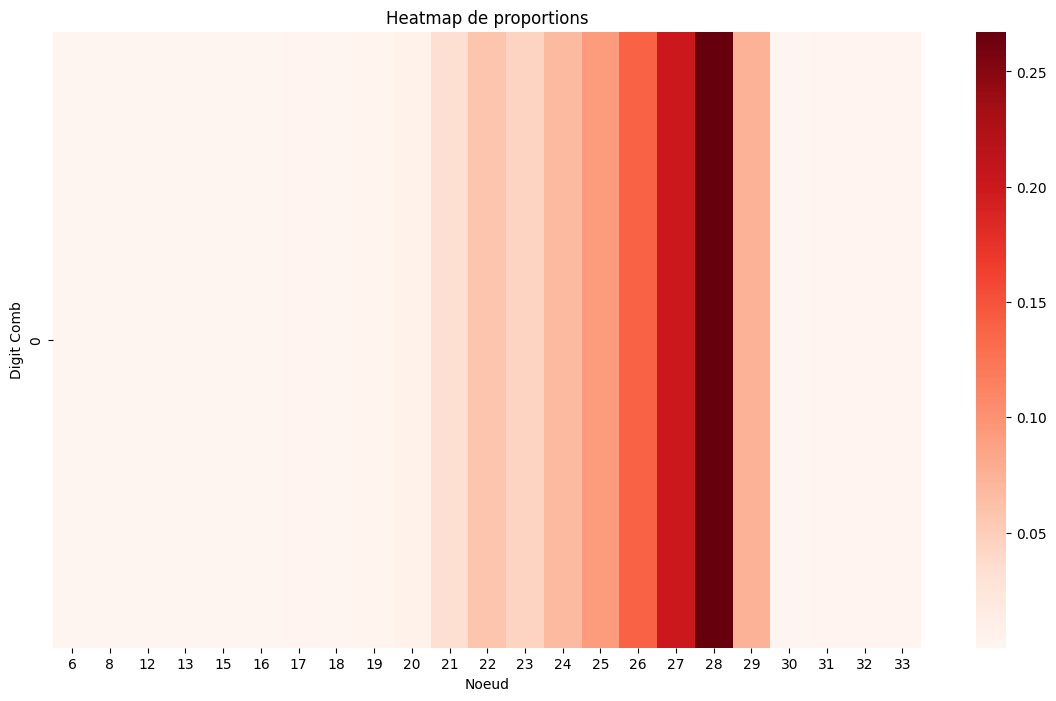

In [7]:
heatmap_data = df.groupby(['first_digit_comb', 'noeud']).size().unstack(fill_value=0)

# Normaliser les comptages pour obtenir des proportions
heatmap_data = heatmap_data / heatmap_data.sum().sum()

# Créer la heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="Reds")
plt.title('Heatmap de proportions')
plt.xlabel('Noeud')
plt.ylabel('Digit Comb')
plt.show()

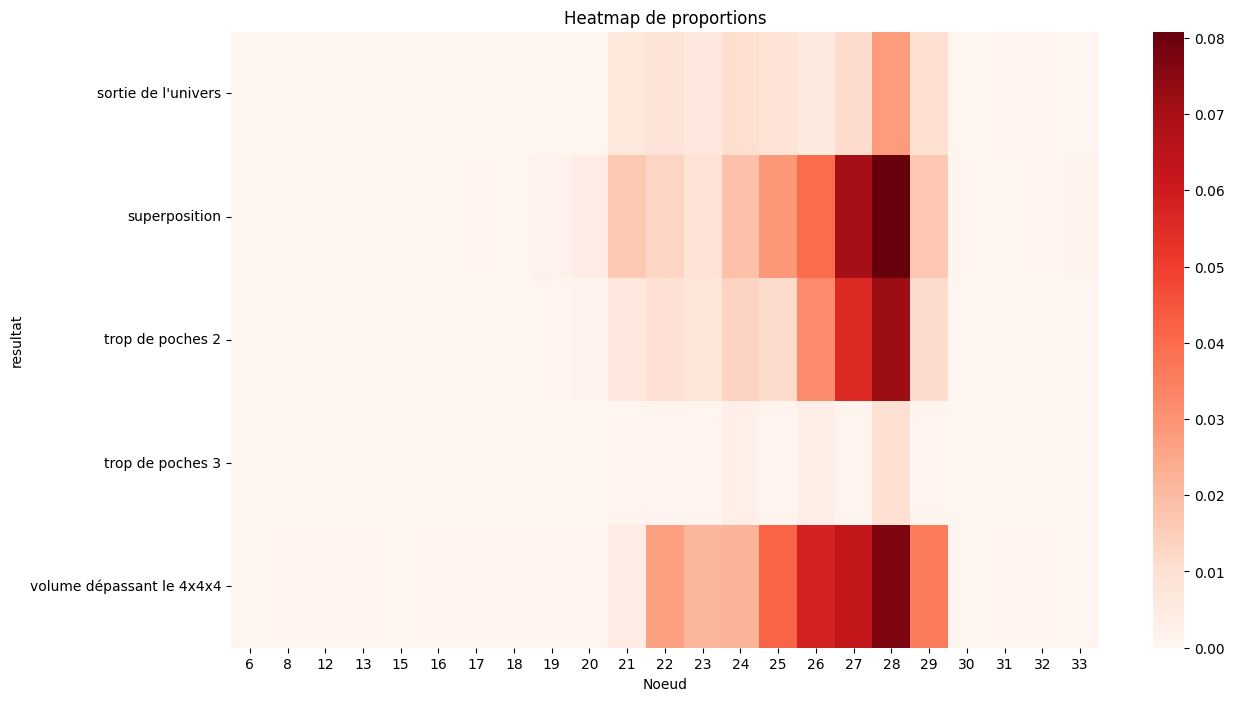

In [8]:
heatmap_data = df.groupby(['resultat', 'noeud']).size().unstack(fill_value=0)

# Normaliser les comptages pour obtenir des proportions
heatmap_data = heatmap_data / heatmap_data.sum().sum()

# Créer la heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="Reds")
plt.title('Heatmap de proportions')
plt.xlabel('Noeud')
plt.ylabel('resultat')
plt.show()

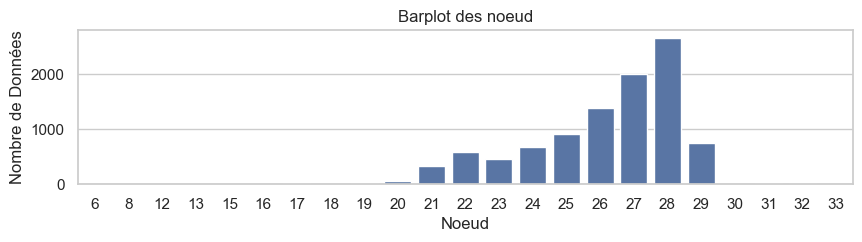

In [9]:
sns.set(style="whitegrid")

# Création du barplot
plt.figure(figsize=(10, 2))
sns.barplot(x='noeud', y='noeud', data=df, estimator=len, errorbar=None)
plt.title('Barplot des noeud')
plt.xlabel('Noeud')
plt.ylabel('Nombre de Données')
plt.show()

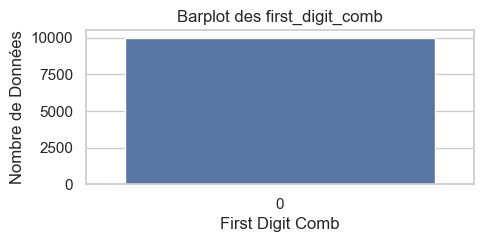

In [10]:
sns.set(style="whitegrid")

# Création du barplot
plt.figure(figsize=(5, 2))
sns.barplot(x='first_digit_comb', y='first_digit_comb', data=df, estimator=len, errorbar=None)
plt.title('Barplot des first_digit_comb')
plt.xlabel('First Digit Comb')
plt.ylabel('Nombre de Données')
plt.show()

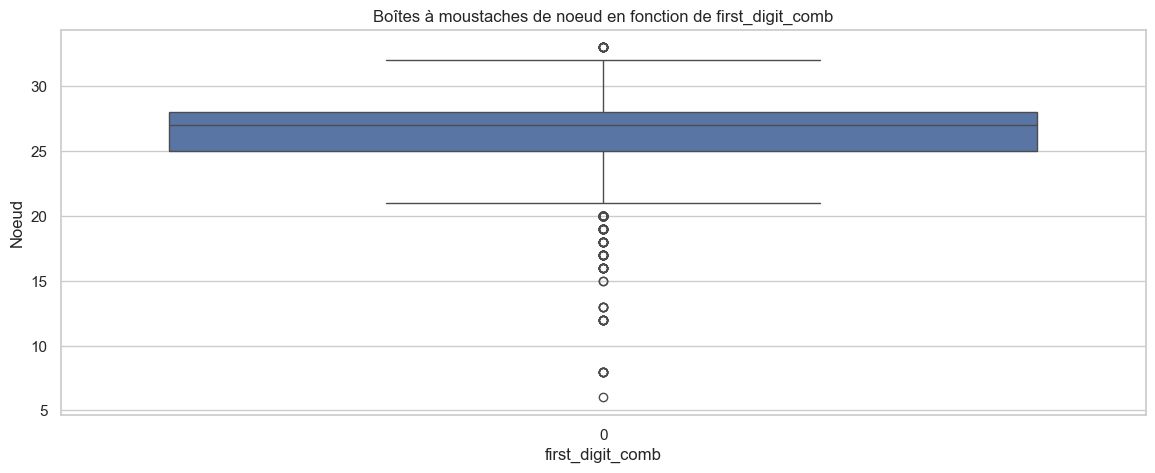

In [11]:
sns.set(style="whitegrid")

# Création du graphe de boîtes à moustaches
plt.figure(figsize=(14, 5))
sns.boxplot(x='first_digit_comb', y='noeud', data=df)
plt.title('Boîtes à moustaches de noeud en fonction de first_digit_comb')
plt.xlabel('first_digit_comb')
plt.ylabel('Noeud')
plt.show()

In [12]:
df.sort_values("noeud", ascending=False).combinaison[50954]

KeyError: 50954

In [13]:
df.sort_values("noeud", ascending=False)

,id,combinaison_num,combinaison,noeud,resultat,first_digit_comb,noeud_moyen,noeud_max,count
5540,5541,416236757216959397888000,"[0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, ...",33,superposition,0,26.111,33,10000
5537,5538,416236757216959347556352,"[0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, ...",33,superposition,0,26.111,33,10000
1317,1318,416236177929774965981184,"[0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, ...",33,superposition,0,26.111,33,10000
1318,1319,416236177929774982758400,"[0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, ...",33,trop de poches 2,0,26.111,33,10000
1319,1320,416236177929774999535616,"[0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, ...",33,trop de poches 2,0,26.111,33,10000
...,...,...,...,...,...,...,...,...,...
5,6,377789318629571617095680,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",8,superposition,0,26.111,33,10000
4,5,358899852698093036240896,"[0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, ...",8,volume dépassant le 4x4x4,0,26.111,33,10000
3,4,340010386766614455386112,"[0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, ...",8,volume dépassant le 4x4x4,0,26.111,33,10000
2,3,321120920835135874531328,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...",8,volume dépassant le 4x4x4,0,26.111,33,10000
